## 1. Import Library and Datasets

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("laptop_details.csv")
df.head(16)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,"₹38,990",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,"₹44,990",AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [4]:
df.isna().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

## 2. Extracting the Details using Regex

In [5]:
print(df['Product'][0])
print(df['Feature'][0])

Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop
Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty


In [6]:
print(df['Product'][2])
print(df['Feature'][2])

ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty


In [7]:
print(df['Product'][3])
print(df['Feature'][3])

HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...
AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty


In [8]:
def extract_features(row):
    product = row['Product']
    feature = row['Feature']

    brand = re.findall(r'^\w+', product)
    brand = brand[0] if brand else None
    
    gen = re.findall(r'(?:7th|8th|9th|10th|11th|12th)[\s\w]+Gen', feature)
    gen = gen[0] if gen else 'Undefine'

    os = re.findall(r'(Windows (?:10|11)|Mac OS|Linux|DOS|Chrome)[\s\w]*Operating System', feature)
    os = os[0] if os else None
    
    ram_size = re.findall(r'(\d+) ?(?:GB|TB)', feature)
    ram_size = ram_size[0] + ' GB' if ram_size else None
    
    ram_type = re.findall(r'LPDDR3|LPDDR4X|DDR4|DDR5|RAMMac', feature)
    ram_type = ram_type[0] if ram_type else None
    
    processor = re.findall(r'(?:AMD|Intel|Apple)[\s\w]+(?:Core|Ryzen|Celeron|M1|M2|Pentium|Snapdragon|Athlon)[\s\w]+Processor', feature)
    processor = processor[0] if processor else None
    
    ssd = re.findall(r'[\d]+\s(?:GB|TB)\s(?:SSD)', product)
    ssd = ssd[0] if ssd else 'No SSD'

    hdd = re.findall(r'[\d]+\s(?:GB|TB)\s(?:HDD)', product)
    hdd = hdd[0] if hdd else 'No HDD'
    
    display_cm = re.findall(r'[0-9.]+\s(?:cm)', feature)
    display_cm = display_cm[0] if display_cm else None
    
    return pd.Series([brand, gen, os,  processor, ram_size, ram_type, ssd, hdd, display_cm], 
                     index=['Brand', 'Generation', 'OS', 'Processor', 'RAM_Size', 'RAM_Type', 'SSD', 'HDD', 'Display'])

df[['Brand', 'Generation', 'OS', 'Processor', 'RAM_Size', 'RAM_Type', 'SSD', 'HDD', 'Display']] = df.apply(extract_features, axis=1)

In [9]:
df.sample(5)

,Product,Rating,MRP,Feature,Brand,Generation,OS,Processor,RAM_Size,RAM_Type,SSD,HDD,Display
23,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,4.2,"₹35,590",AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,Lenovo,Undefine,Windows 11,AMD Ryzen 3 Dual Core Processor,8 GB,DDR4,512 GB SSD,No HDD,39.62 cm
164,ASUS TUF Gaming A15 with 90Whr Battery Ryzen 7...,4.6,"₹89,990",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,ASUS,Undefine,Windows 11,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,No HDD,39.62 cm
652,MSI Creator 15 Core i7 10th Gen - (32 GB/1 TB ...,NaN,"₹2,14,990",Intel Core i7 Processor (10th Gen)32 GB DDR4 R...,MSI,10th Gen,Windows 10,Intel Core i7 Processor,32 GB,DDR4,1 TB SSD,No HDD,39.62 cm
230,ASUS ROG Strix G15 Advantage Edition with 90Wh...,4.9,"₹1,50,990",AMD Ryzen 9 Octa Core Processor16 GB DDR4 RAMW...,ASUS,Undefine,Windows 11,AMD Ryzen 9 Octa Core Processor,16 GB,DDR4,1 TB SSD,No HDD,39.62 cm
262,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...,4.3,"₹58,000",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,11th Gen,Windows 10,Intel Core i5 Processor,8 GB,DDR4,512 GB SSD,No HDD,35.56 cm


In [10]:
laptop_data = df.drop(['Product', 'Feature', 'Rating'], axis=1)
laptop_data = laptop_data[['Brand', 'OS', 'Generation', 'Processor', 'RAM_Type', 'RAM_Size', 'SSD', 'HDD', 'Display', 'MRP']]

In [11]:
laptop_data.sample(5)

,Brand,OS,Generation,Processor,RAM_Type,RAM_Size,SSD,HDD,Display,MRP
633,Lenovo,Windows 10,11th Gen,Intel Core i5 Processor,DDR4,16 GB,512 GB SSD,No HDD,39.62 cm,"₹66,990"
293,Infinix,Windows 11,10th Gen,Intel Core i7 Processor,LPDDR4X,16 GB,512 GB SSD,No HDD,35.56 cm,"₹46,990"
198,acer,Windows 10,Undefine,AMD Ryzen 5 Quad Core Processor,DDR4,8 GB,512 GB SSD,No HDD,39.62 cm,"₹39,990"
685,DELL,Windows 11,Undefine,AMD Ryzen 7 Octa Core Processor,DDR4,16 GB,512 GB SSD,No HDD,40.64 cm,"₹77,990"
164,ASUS,Windows 11,Undefine,AMD Ryzen 7 Octa Core Processor,DDR4,16 GB,512 GB SSD,No HDD,39.62 cm,"₹89,990"


## 3. Data Understanding and Cleaning the Data

In [12]:
laptop_data.isna().sum()

Brand         0
OS            0
Generation    0
Processor     1
RAM_Type      0
RAM_Size      0
SSD           0
HDD           0
Display       0
MRP           0
dtype: int64

In [13]:
df1 = laptop_data[laptop_data.isna().any(axis=1)]

In [14]:
df1

,Brand,OS,Generation,Processor,RAM_Type,RAM_Size,SSD,HDD,Display,MRP
83,SAMSUNG,Windows 11,Undefine,None,LPDDR4X,4 GB,No SSD,No HDD,35.56 cm,"₹32,990"


In [15]:
laptop_data = laptop_data.dropna(how='any',axis=0)

In [16]:
laptop_data.duplicated().sum()

313

In [17]:
laptop_data = laptop_data.drop_duplicates()

In [18]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       406 non-null    object
 1   OS          406 non-null    object
 2   Generation  406 non-null    object
 3   Processor   406 non-null    object
 4   RAM_Type    406 non-null    object
 5   RAM_Size    406 non-null    object
 6   SSD         406 non-null    object
 7   HDD         406 non-null    object
 8   Display     406 non-null    object
 9   MRP         406 non-null    object
dtypes: object(10)
memory usage: 34.9+ KB


In [19]:
laptop_data["Brand"].value_counts()

ASUS         128
Lenovo        62
HP            57
DELL          56
acer          34
MSI           28
Infinix       14
APPLE         13
realme         3
ALIENWARE      3
RedmiBook      2
Ultimus        2
SAMSUNG        1
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64

In [20]:
laptop_data["Display"].value_counts()

39.62 cm    235
35.56 cm     90
33.78 cm     16
40.64 cm     15
43.94 cm      9
29.46 cm      8
40.89 cm      8
34.04 cm      5
35.81 cm      4
38.1 cm       4
41.15 cm      3
88.9 cm       2
36.07 cm      2
34.54 cm      1
33.02 cm      1
38.0 cm       1
34.29 cm      1
42.16 cm      1
Name: Display, dtype: int64

In [21]:
laptop_data["OS"].value_counts()

Windows 11    270
Windows 10    113
Mac OS         13
Chrome          6
DOS             4
Name: OS, dtype: int64

In [22]:
laptop_data["Generation"].value_counts()

Undefine    163
11th Gen    121
12th Gen     62
10th Gen     53
9th Gen       3
8th Gen       3
7th Gen       1
Name: Generation, dtype: int64

In [23]:
laptop_data["RAM_Size"].value_counts()

8 GB      217
16 GB     140
4 GB       31
32 GB      16
128 GB      2
Name: RAM_Size, dtype: int64

In [24]:
laptop_data["RAM_Type"].value_counts()

DDR4       321
DDR5        47
LPDDR4X     29
RAMMac       8
LPDDR3       1
Name: RAM_Type, dtype: int64

In [25]:
laptop_data["SSD"].value_counts()

512 GB SSD    216
256 GB SSD     87
1 TB SSD       69
No SSD         22
128 GB SSD      6
2 TB SSD        6
Name: SSD, dtype: int64

In [26]:
laptop_data["HDD"].value_counts()

No HDD        362
1 TB HDD       43
256 GB HDD      1
Name: HDD, dtype: int64

In [27]:
laptop_data["Processor"].value_counts()

Intel Core i5 Processor                108
Intel Core i3 Processor                 68
Intel Core i7 Processor                 50
AMD Ryzen 5 Hexa Core Processor         41
AMD Ryzen 7 Octa Core Processor         37
Intel Celeron Dual Core Processor       18
AMD Ryzen 3 Dual Core Processor         17
AMD Ryzen 9 Octa Core Processor         15
Intel Core i9 Processor                 11
AMD Ryzen 5 Quad Core Processor          8
Apple M1 Processor                       5
Apple M1 Pro Processor                   4
AMD Ryzen 3 Quad Core Processor          3
Apple M2 Processor                       3
Intel Pentium Silver Processor           3
AMD Ryzen 5 Dual Core Processor          2
AMD Athlon Dual Core Processor           2
Intel Celeron Quad Core Processor        2
Intel OptaneIntel Core i3 Processor      2
Intel Pentium Quad Core Processor        2
AMD Dual Core Processor                  1
Intel Evo Core i5 Processor              1
Apple M1 Max Processor                   1
AMD Ryzen 7

In [28]:
laptop_data.Processor = laptop_data.Processor.apply(lambda x : x.replace('Intel OptaneIntel Core i3 Processor', 'Intel Core i3 Processor'))

In [29]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       406 non-null    object
 1   OS          406 non-null    object
 2   Generation  406 non-null    object
 3   Processor   406 non-null    object
 4   RAM_Type    406 non-null    object
 5   RAM_Size    406 non-null    object
 6   SSD         406 non-null    object
 7   HDD         406 non-null    object
 8   Display     406 non-null    object
 9   MRP         406 non-null    object
dtypes: object(10)
memory usage: 34.9+ KB


In [30]:
laptop_data.HDD.value_counts()

No HDD        362
1 TB HDD       43
256 GB HDD      1
Name: HDD, dtype: int64

In [31]:
laptop_data.SSD.value_counts()

512 GB SSD    216
256 GB SSD     87
1 TB SSD       69
No SSD         22
128 GB SSD      6
2 TB SSD        6
Name: SSD, dtype: int64

In [32]:
laptop_data.MRP = laptop_data.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)
laptop_data.RAM_Size = laptop_data.RAM_Size.apply(lambda x : x.replace('GB', '')).astype(int)

In [33]:
laptop_data.SSD.unique()

array(['256 GB SSD', '512 GB SSD', '1 TB SSD', 'No SSD', '128 GB SSD',
       '2 TB SSD'], dtype=object)

In [34]:
laptop_data.SSD = laptop_data.SSD.apply(lambda x : x.replace('1 TB SSD', '1024 GB SSD').replace('2 TB SSD', '2048 GB SSD').replace('No SSD', '0 GB SSD'))
laptop_data.SSD = laptop_data.SSD.apply(lambda x : x.replace('GB SSD', '')).astype(int)

In [35]:
df.HDD.unique()

array(['No HDD', '1 TB HDD', '256 GB HDD'], dtype=object)

In [36]:
laptop_data.HDD.unique()

array(['No HDD', '1 TB HDD', '256 GB HDD'], dtype=object)

In [37]:
laptop_data.HDD = laptop_data.HDD.apply(lambda x : x.replace('1 TB HDD', '1024 GB HDD').replace('No HDD', '0 GB HDD'))
laptop_data.HDD = laptop_data.HDD.apply(lambda x : x.replace('GB HDD', '')).astype(int)

In [38]:
laptop_data.Display.value_counts()

39.62 cm    235
35.56 cm     90
33.78 cm     16
40.64 cm     15
43.94 cm      9
29.46 cm      8
40.89 cm      8
34.04 cm      5
35.81 cm      4
38.1 cm       4
41.15 cm      3
88.9 cm       2
36.07 cm      2
34.54 cm      1
33.02 cm      1
38.0 cm       1
34.29 cm      1
42.16 cm      1
Name: Display, dtype: int64

In [39]:
laptop_data.Display = laptop_data.Display.apply(lambda x : x.replace('cm', '')).astype(float)

In [40]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       406 non-null    object 
 1   OS          406 non-null    object 
 2   Generation  406 non-null    object 
 3   Processor   406 non-null    object 
 4   RAM_Type    406 non-null    object 
 5   RAM_Size    406 non-null    int32  
 6   SSD         406 non-null    int32  
 7   HDD         406 non-null    int32  
 8   Display     406 non-null    float64
 9   MRP         406 non-null    int32  
dtypes: float64(1), int32(4), object(5)
memory usage: 28.5+ KB


In [41]:
laptop_data.head(10)

,Brand,OS,Generation,Processor,RAM_Type,RAM_Size,SSD,HDD,Display,MRP
0,Lenovo,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8,256,0,35.56,36990
1,Lenovo,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8,512,0,39.62,39990
2,ASUS,Windows 11,10th Gen,Intel Core i3 Processor,DDR4,8,512,0,39.62,32990
3,HP,Windows 10,Undefine,AMD Ryzen 5 Hexa Core Processor,DDR4,8,512,0,39.62,49990
4,ASUS,Windows 11,10th Gen,Intel Core i5 Processor,DDR4,8,512,0,39.62,49990
5,HP,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8,256,0,35.56,36990
6,DELL,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8,256,1024,39.62,38990
7,RedmiBook,Windows 11,11th Gen,Intel Core i5 Processor,DDR4,8,512,0,39.62,39990
8,realme,Windows 10,11th Gen,Intel Core i3 Processor,DDR4,8,256,0,35.56,46990
9,ASUS,Windows 11,Undefine,AMD Ryzen 7 Quad Core Processor,DDR4,16,512,0,35.56,44990


## 4. Data Analysis

In [42]:
laptop_data.columns

Index(['Brand', 'OS', 'Generation', 'Processor', 'RAM_Type', 'RAM_Size', 'SSD',
       'HDD', 'Display', 'MRP'],
      dtype='object')

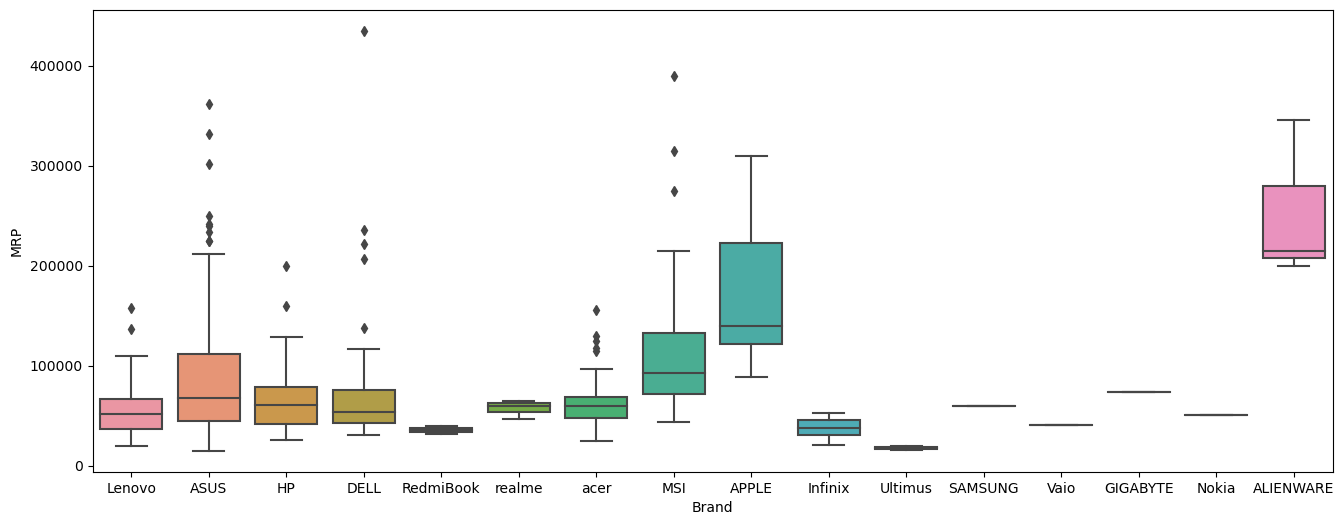

In [43]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['Brand'], y = laptop_data['MRP']);

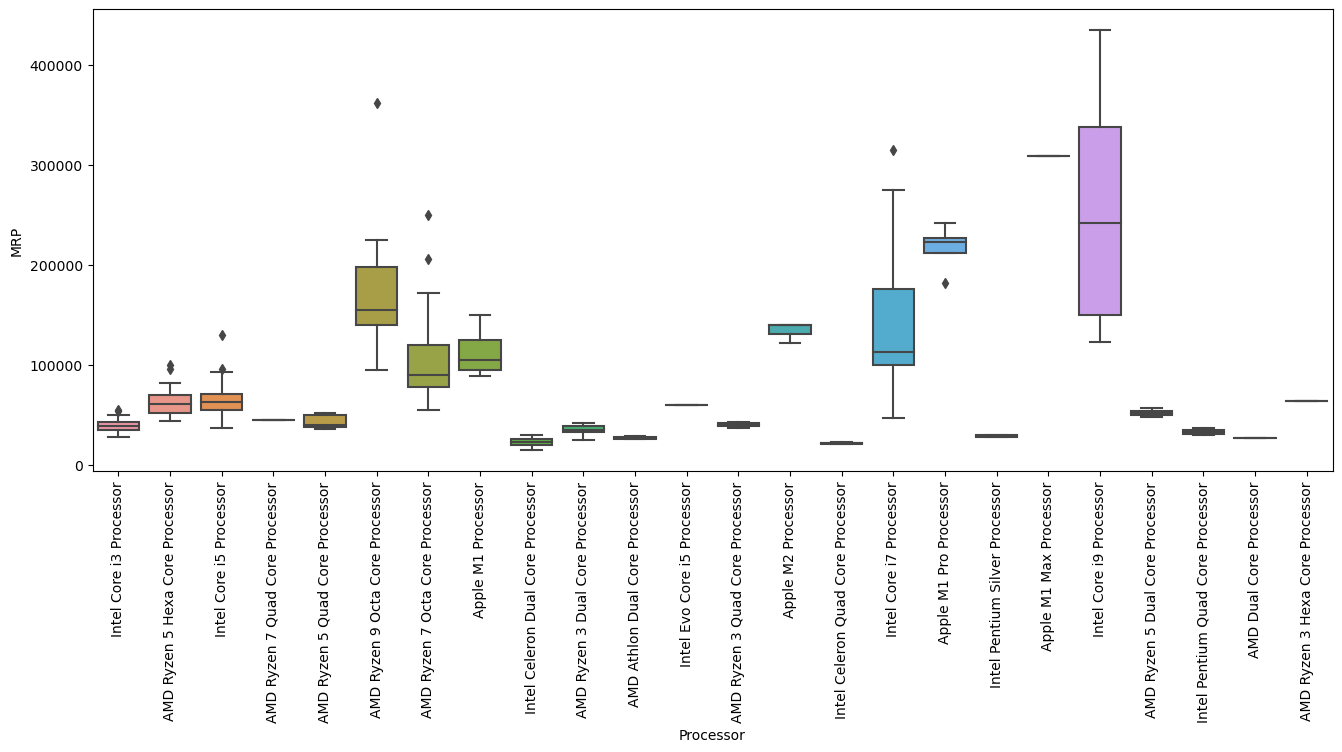

In [44]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['Processor'], y = laptop_data['MRP'])
plt.xticks(rotation ='vertical');

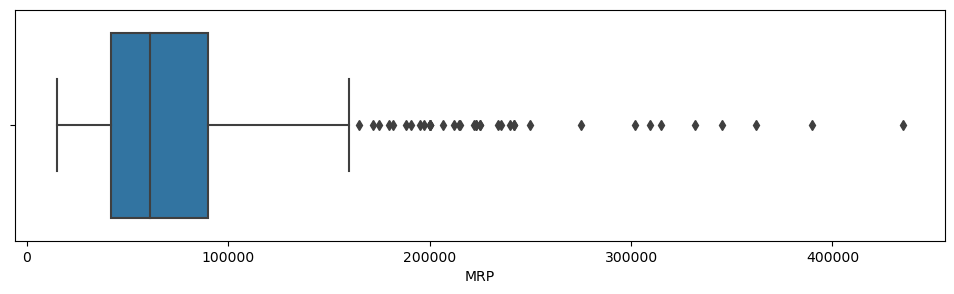

In [45]:
plt.figure(figsize=(12,3))
sns.boxplot(x = laptop_data['MRP']);

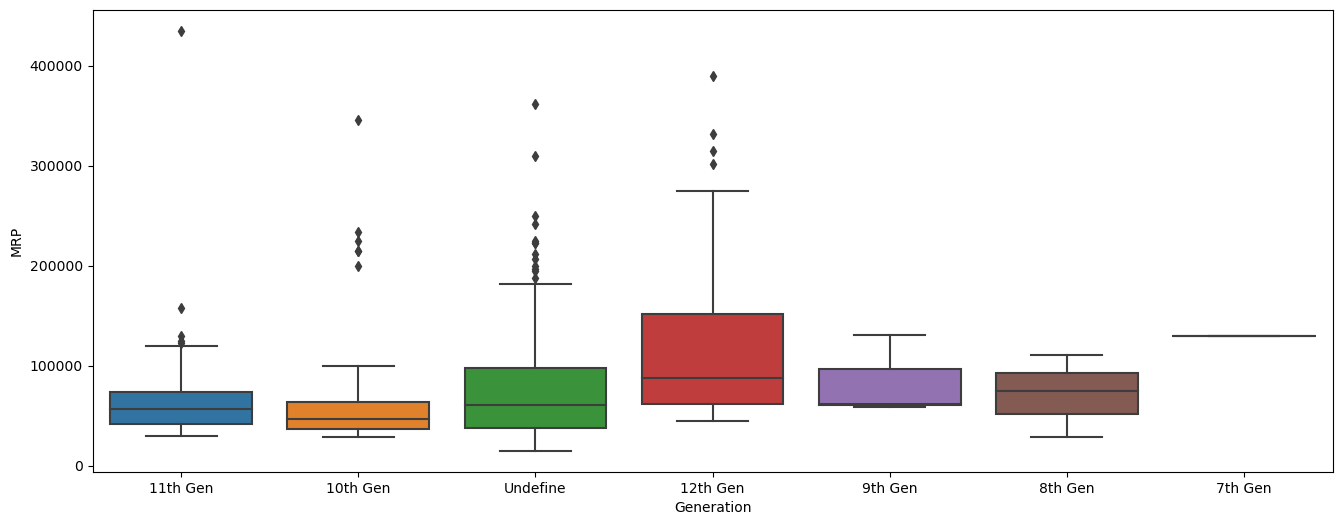

In [46]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['Generation'], y = laptop_data['MRP']);

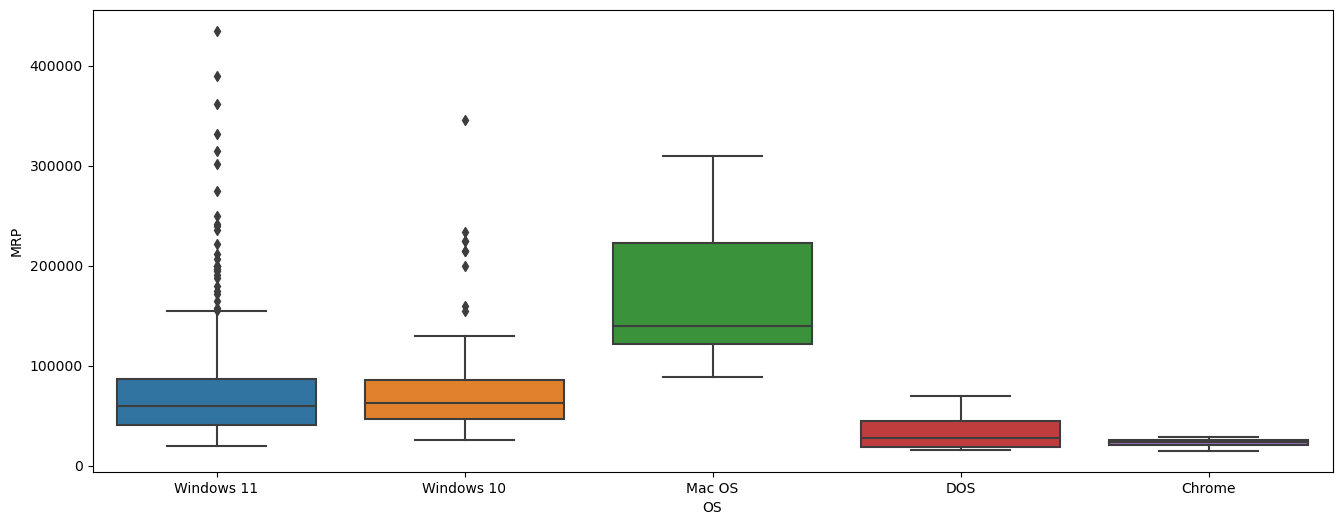

In [47]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['OS'], y = laptop_data['MRP']);

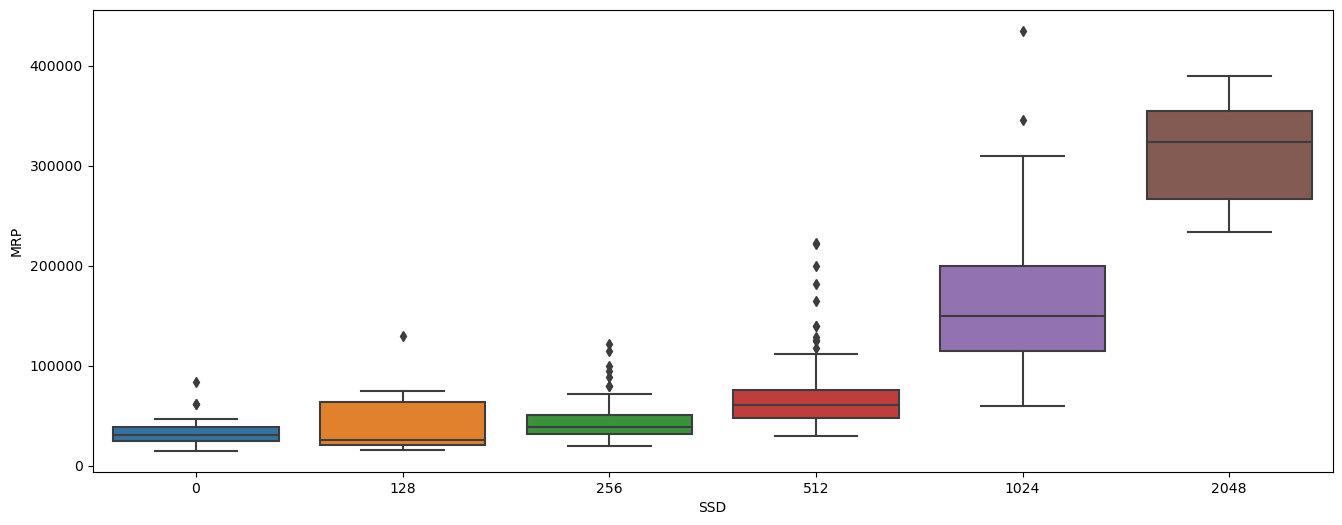

In [48]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['SSD'], y = laptop_data['MRP']);

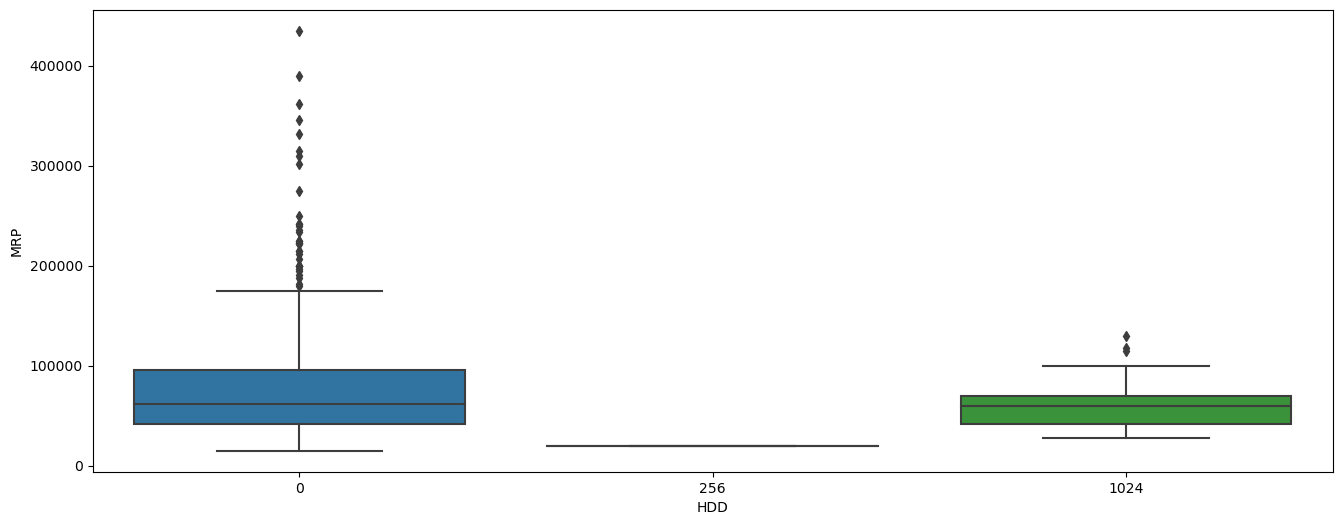

In [49]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['HDD'], y = laptop_data['MRP']);

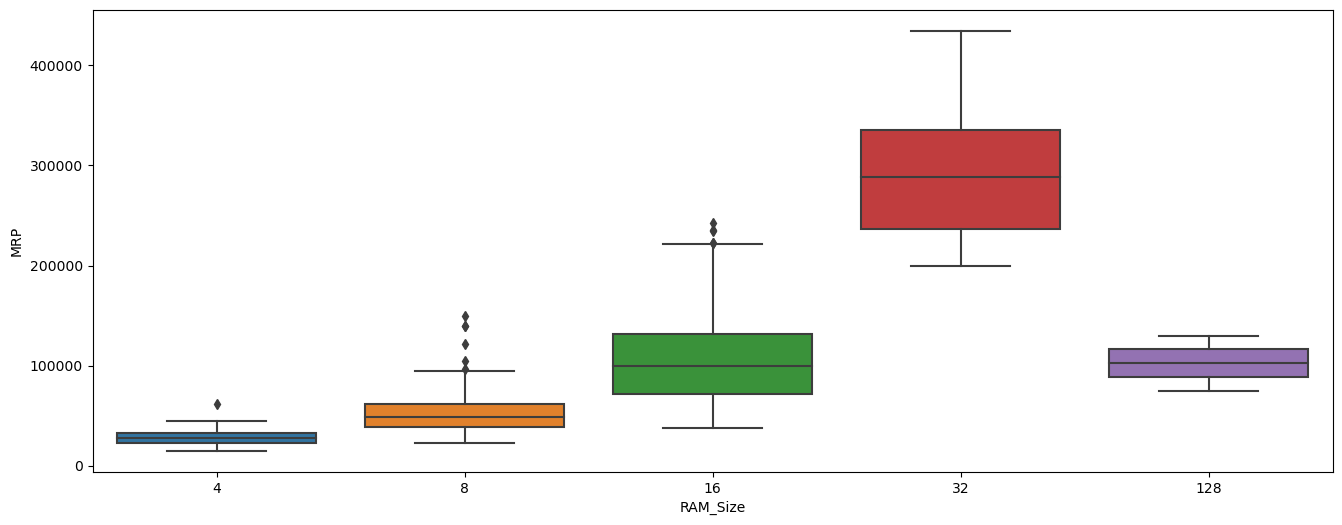

In [50]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['RAM_Size'], y = laptop_data['MRP']);

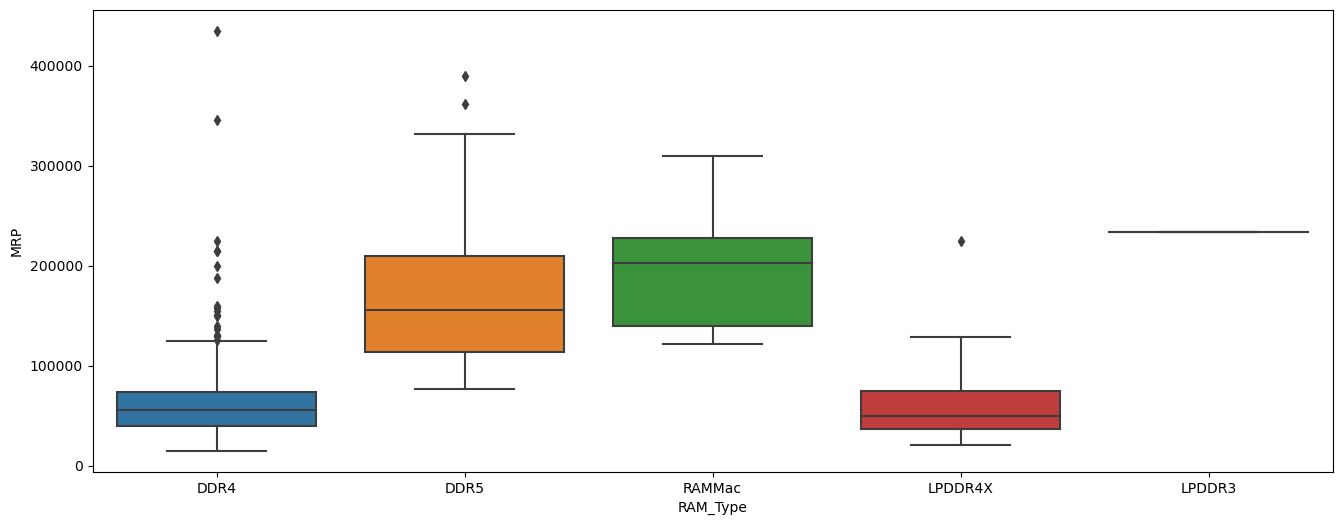

In [51]:
plt.figure(figsize=(16,6))
sns.boxplot(x = laptop_data['RAM_Type'], y = laptop_data['MRP']);

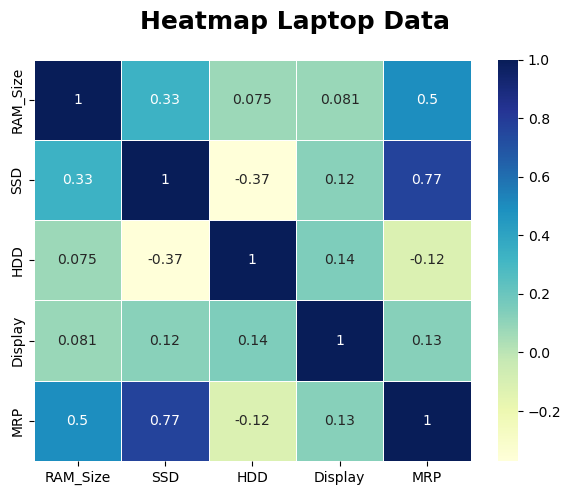

In [52]:
fig = plt.figure(figsize=(6,5))

sns.heatmap(laptop_data.corr(), annot = True, cmap='YlGnBu', linewidth=.5)
fig.suptitle('Heatmap Laptop Data',fontsize=18, fontweight="bold")
fig.tight_layout()
plt.show()

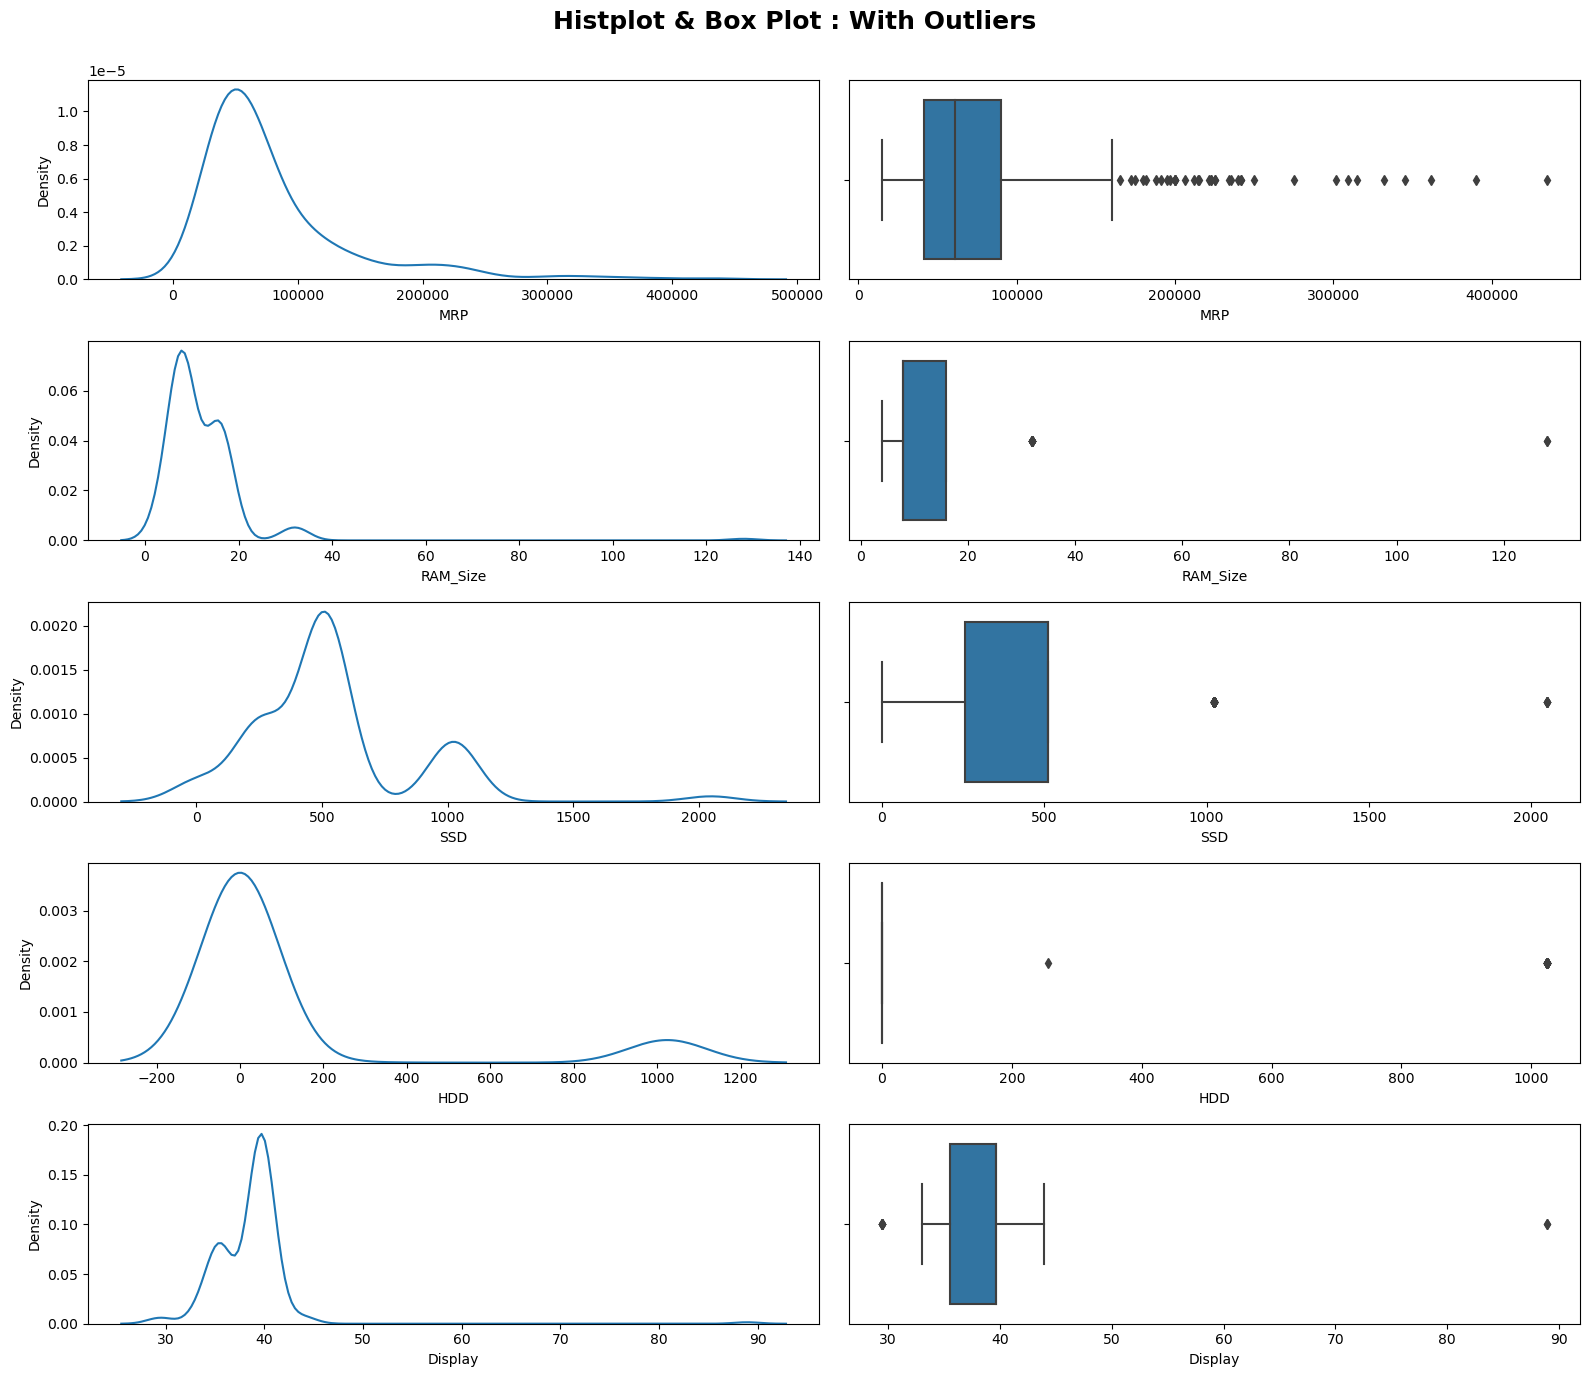

In [53]:
fig, ax = plt.subplots(5,2, figsize = (16,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = laptop_data, x = 'MRP')
sns.boxplot(ax= ax[0,1], data = laptop_data, x = 'MRP')
sns.kdeplot(ax= ax[1,0], data = laptop_data, x = 'RAM_Size')
sns.boxplot(ax= ax[1,1], data = laptop_data, x = 'RAM_Size')
sns.kdeplot(ax= ax[2,0], data = laptop_data, x = 'SSD')
sns.boxplot(ax= ax[2,1], data = laptop_data, x = 'SSD')
sns.kdeplot(ax= ax[3,0], data = laptop_data, x = 'HDD')
sns.boxplot(ax= ax[3,1], data = laptop_data, x = 'HDD')
sns.kdeplot(ax= ax[4,0], data = laptop_data, x = 'Display')
sns.boxplot(ax= ax[4,1], data = laptop_data, x = 'Display')

fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

In [54]:
laptop_data[laptop_data.Display > 50]

,Brand,OS,Generation,Processor,RAM_Type,RAM_Size,SSD,HDD,Display,MRP
142,DELL,Windows 11,Undefine,AMD Ryzen 3 Dual Core Processor,DDR4,8,0,1024,88.9,33099
349,DELL,Windows 10,11th Gen,Intel Core i5 Processor,DDR4,8,512,0,88.9,63090


In [55]:
laptop_data[laptop_data.RAM_Size > 64]

,Brand,OS,Generation,Processor,RAM_Type,RAM_Size,SSD,HDD,Display,MRP
438,acer,Windows 10,7th Gen,Intel Core i5 Processor,DDR4,128,128,1024,39.62,129999
644,acer,Windows 10,8th Gen,Intel Core i5 Processor,DDR4,128,128,1024,39.62,74590


In [56]:
laptop_data.reset_index()    #this will change the index from timestamp to 0,1,2...n-1
laptop_data1 = laptop_data.drop([142,349,438,644])  # will drop the rows

In [57]:
laptop_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       402 non-null    object 
 1   OS          402 non-null    object 
 2   Generation  402 non-null    object 
 3   Processor   402 non-null    object 
 4   RAM_Type    402 non-null    object 
 5   RAM_Size    402 non-null    int32  
 6   SSD         402 non-null    int32  
 7   HDD         402 non-null    int32  
 8   Display     402 non-null    float64
 9   MRP         402 non-null    int32  
dtypes: float64(1), int32(4), object(5)
memory usage: 28.3+ KB


In [58]:
laptop_data1.to_csv('laptop_data.csv', index=False)

## Sprint - 2 (ML Model Tuning)
Congratulations! Elon Musk is happy with your models and insights that
you have shared in the previous requirements.
Now he wants you to test the models you have created for Underfitting and
Overfitting. He wants you to build a best fit model.
Todo -
1. First try to check if the models you have created are a best fit or not.
2. See if applying cross validation helps improve your models
performance

## 5. Model Building

In [59]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
laptop_data1 = pd.read_csv('laptop_data.csv')
laptop_data1

,Brand,OS,Generation,Processor,RAM_Type,RAM_Size,SSD,HDD,Display,MRP
0,Lenovo,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8,256,0,35.56,36990
1,Lenovo,Windows 11,11th Gen,Intel Core i3 Processor,DDR4,8,512,0,39.62,39990
2,ASUS,Windows 11,10th Gen,Intel Core i3 Processor,DDR4,8,512,0,39.62,32990
3,HP,Windows 10,Undefine,AMD Ryzen 5 Hexa Core Processor,DDR4,8,512,0,39.62,49990
4,ASUS,Windows 11,10th Gen,Intel Core i5 Processor,DDR4,8,512,0,39.62,49990
...,...,...,...,...,...,...,...,...,...,...
397,DELL,Windows 11,12th Gen,Intel Core i5 Processor,DDR5,16,512,0,33.78,76590
398,HP,Windows 10,Undefine,AMD Ryzen 7 Octa Core Processor,DDR4,16,512,0,39.62,90000
399,ASUS,Chrome,Undefine,Intel Celeron Dual Core Processor,DDR4,4,0,0,29.46,23490
400,ASUS,Windows 11,12th Gen,Intel Core i7 Processor,DDR5,16,512,0,35.56,125990


In [61]:
laptop_data1 = laptop_data1.drop(['Brand'], axis=1)

In [62]:
def encoding(feature):
    laptop_data1[feature+'_Encoded'] = LabelEncoder().fit_transform(laptop_data1[feature])
features = ['OS', 'Generation', 'Processor', 'RAM_Type']

In [63]:
for i in features: encoding(i)

In [64]:
laptop_data1.columns

Index(['OS', 'Generation', 'Processor', 'RAM_Type', 'RAM_Size', 'SSD', 'HDD',
       'Display', 'MRP', 'OS_Encoded', 'Generation_Encoded',
       'Processor_Encoded', 'RAM_Type_Encoded'],
      dtype='object')

In [65]:
laptop_model = laptop_data1[['OS_Encoded', 'Generation_Encoded', 'Processor_Encoded',
                            'RAM_Type_Encoded', 'RAM_Size', 'SSD', 'HDD', 'Display', 'MRP']]

In [66]:
laptop_model['Processor_Encoded'].unique()

array([17,  6, 18,  9,  7, 10,  8, 13, 15,  2,  0, 21,  4, 14, 16, 19, 12,
       23, 11, 20,  5, 22,  1,  3])

In [67]:
laptop_data1['Processor'].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', 'Intel Pentium Silver Processor',
       'Apple M1 Max Processor', 'Intel Core i9 Processor',
       'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [68]:
X = laptop_model.drop('MRP',axis=1)
y = laptop_model['MRP'].values

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [70]:
X_train.shape

(321, 8)

In [71]:
X_test.shape

(81, 8)

## 5.1 Linear Regression

In [72]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [73]:
lin.score(X_test,y_test)

0.8261274135101588

In [74]:
y_pred_lin = lin.predict(X_test)

print('R2 score            :',r2_score(y_pred_lin,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(y_pred_lin,y_test))

R2 score            : 0.767000451611685
MA Percentage Error : 0.27118382078050884


## 5.2 Random Forest

In [75]:
rf = RandomForestRegressor(random_state=20)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=20)

In [76]:
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-15155.129354510364

In [77]:
y_pred_rf = rf.predict(X_test)

print('R2 Score            :',r2_score(y_pred_rf,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(y_pred_rf,y_test))

R2 Score            : 0.7916661812923751
MA Percentage Error : 0.17535232802094072


### 5.2.1 Tuning the model using GridSearchCV

In [78]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt')}

In [79]:
grid_cv = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=20),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [80]:
grid_cv.best_score_

-14425.765179952157

In [81]:
grid_cv.best_estimator_

RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=240,
                      random_state=20)

In [82]:
tune_pred_rf = grid_cv.best_estimator_.predict(X_test)

In [83]:
print('R2 score            :',r2_score(tune_pred_rf,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(tune_pred_rf,y_test))

R2 score            : 0.8091861102832967
MA Percentage Error : 0.16717865457640718


## 5.3 GradientBoostingRegressor

In [85]:
gbr = GradientBoostingRegressor(random_state = 20)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=20)

In [86]:
y_pred_gbr = gbr.predict(X_test)

print('R2 score            :',r2_score(y_pred_gbr,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(y_pred_gbr,y_test))

R2 score            : 0.8260056569009526
MA Percentage Error : 0.1534705134075279


### 5.3.1 Hyperparameter Tuning

In [87]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [88]:
gbr_tune = GradientBoostingRegressor()
search_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search = GridSearchCV(estimator=gbr_tune,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [89]:
search.fit(X,y)
search.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 1}

In [90]:
gbr_tune_1 = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.1,subsample=1,max_depth=1,random_state=1)
score = np.mean(cross_val_score(gbr_tune_1,X,y,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
gbr_tune_1.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=2000, random_state=1,
                          subsample=1)

In [91]:
y_pred_gbr = gbr_tune_1.predict(X_test)

print('R2 score            :',r2_score(y_pred_gbr,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(y_pred_gbr,y_test))

R2 score            : 0.8042084562987672
MA Percentage Error : 0.1673460034164616


## 5.4 XGBoost

In [92]:
xgb = XGBRegressor(random_state = 20)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=20, ...)

In [93]:
y_pred_xgb = xgb.predict(X_test)

print('R2 score            :',r2_score(y_pred_xgb,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(y_pred_xgb,y_test))

R2 score            : 0.7449275259243939
MA Percentage Error : 0.1799106195099384


In [94]:
xgb_1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [95]:
xgb_grid = GridSearchCV(xgb_1, parameters, cv = 2, n_jobs = 5, verbose=True)
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[16:04:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [96]:
xgb_grid.best_score_

0.704484539130881

In [97]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [98]:
y_pred_xgb_1 = xgb_grid.predict(X_test)

In [99]:
print('R2 score            :',r2_score(y_pred_xgb_1,y_test))
print('MA Percentage Error :',mean_absolute_percentage_error(y_pred_xgb_1,y_test))

R2 score            : 0.8195393803854288
MA Percentage Error : 0.17244010429062606


## 6. Actual vs Prediction 

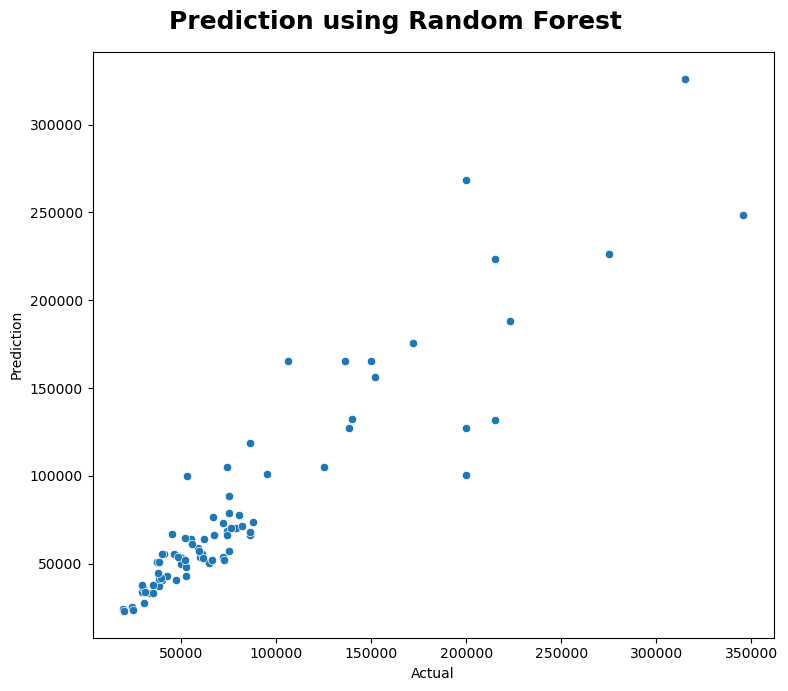

In [100]:
fig = plt.figure(figsize=(8,7))

sns.scatterplot(x=y_test,y=tune_pred_rf)
fig.suptitle('Prediction using Random Forest', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")

fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

## 7. Model Deployement - Using Joblib

In [101]:
import joblib

In [102]:
joblib.dump(grid_cv,'rf_model.pkl')

['rf_model.pkl']

In [103]:
model = joblib.load('rf_model.pkl')

In [104]:
model

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=20),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

# THE END !!